In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from functools import reduce

In [4]:
calls=pd.read_csv('datasets/calls.csv')
calls.head()

# id — уникальный номер звонка
# call_date — дата звонка
# duration — длительность звонка в минутах
# user_id — идентификатор пользователя, сделавшего звонок

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
internet=pd.read_csv('datasets/internet.csv', index_col=0)
internet.head()

# id — уникальный номер сессии
# mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
# session_date — дата интернет-сессии
# user_id — идентификатор пользователя

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
messages=pd.read_csv('datasets/messages.csv')
messages.head()

# id — уникальный номер сообщения
# message_date — дата сообщения
# user_id — идентификатор пользователя, отправившего сообщение

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs=pd.read_csv('datasets/tariffs.csv')
tariffs.head()

# tariff_name — название тарифа
# rub_monthly_fee — ежемесячная абонентская плата в рублях
# minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
# messages_included — количество сообщений в месяц, включённых в абонентскую плату
# mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
# rub_per_minute — стоимость минуты разговора сверх тарифного пакета
# rub_per_message — стоимость отправки сообщения сверх тарифного пакета
# rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
users=pd.read_csv('datasets/users.csv')
users.head()

# user_id — уникальный идентификатор пользователя
# first_name — имя пользователя
# last_name — фамилия пользователя
# age — возраст пользователя (годы)
# reg_date — дата подключения тарифа (день, месяц, год)
# churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
# city — город проживания пользователя
# tariff — название тарифного плана

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [9]:
# Сводная информация о содержимом для анализа типа данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
# Количество звонков с длительностью, равной нулю
calls.loc[calls['duration'] == 0, 'duration'].value_counts()

duration
0.0    39613
Name: count, dtype: int64

In [11]:
# Сводная информация о содержимом для анализа типа данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [12]:
# Количество ячеек с объёмом трафика, равный нулю
internet.loc[internet['mb_used'] == 0, 'mb_used'].value_counts()

mb_used
0.0    19598
Name: count, dtype: int64

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [16]:
calls.loc[calls['duration'] == 0, 'duration'] = 1
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

In [17]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам

calls['month'] = calls['call_date'].dt.month
calls_grouped = calls.pivot_table(index=['user_id', 'month'], values='duration',  aggfunc=['sum', 'count'])
calls_grouped.columns = ['duration', 'calls']

# Количество отправленных сообщений по месяцам

messages['month'] = messages['message_date'].dt.month
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_grouped.columns = ['messages']

# Объем израсходованного интернет-трафика по месяцам

internet['month'] = internet['session_date'].dt.month
internet_grouped = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_grouped.columns = ['mb_used']

# объединение трёх сводных таблиц в одну общую
dfs = [calls_grouped, messages_grouped, internet_grouped]
data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), dfs)
data.head(20)

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       NaN  18460.0
        12        430.0   63.0       NaN  14059.0
1002    6         118.0   15.0       4.0  10878.0
        7         219.0   26.0      11.0  17615.0
        8         294.0   42.0      13.0  20357.0
        9         217.0   36.0       4.0  16724.0
        10        221.0   33.0      10.0  13913.0
        11        250.0   32.0      16.0  18621.0
        12        242.0   33.0      12.0  18147.0
1003    8         392.0   55.0      37.0   8572.0
        9         990.0  134.0      91.0  12479.0
        10        866.0  108.0      83.0  14779.0

In [18]:
# Проверка новой таблицы на наличие пропусков
data.isna().sum()

duration     40
calls        40
messages    497
mb_used      11
dtype: int64

In [19]:
#Заменим пропущенные значения нулями, для вариации покажем два способа
#метод fillna,восполняющий отсутствующие данные указанным значением
data['duration'].fillna(0, inplace=True)
data['calls'].fillna(0, inplace=True)
data['messages'].fillna(0, inplace=True)
data['mb_used'].fillna(0, inplace=True)
# метод loc,использующийся для доступа к столбцу и установки указанного значения
data.loc[data['calls'].isna(), 'calls'] = 0
data.loc[data['duration'].isna(), 'duration'] = 0
data.loc[data['messages'].isna(), 'messages'] = 0
data.loc[data['mb_used'].isna(), 'mb_used'] = 0

In [20]:
data.isna().sum()

duration    0
calls       0
messages    0
mb_used     0
dtype: int64

In [21]:
#Посчитаем помесячную выручку с каждого пользователя

# добавим наименование используемого тарифа для каждого пользователя
for i in data.index: data.loc[i, 'tariff'] = users.loc[i[0]-1000, 'tariff']

# функция подсчета выручки с каждого пользователя в месяц
def det_revenue(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']#продолжительность минут сверх тарифа
        extra_mb = mb_used - tariffs.loc[0, 'mb_per_month_included']#объем трафика сверх тарифа
        extra_messages = messages - tariffs.loc[0, 'messages_included']#количество сообщений сверх тарифа
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) #расчёт месячной выручки
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

data['revenue'] = data.apply(det_revenue, axis=1)
data.head(10)

duration  calls  messages  mb_used tariff     revenue
user_id month                                                       
1000    5         164.0   22.0      22.0   2257.0  ultra  1950.00000
        6         187.0   43.0      60.0  23262.0  ultra  1950.00000
        7         346.0   47.0      75.0  14017.0  ultra  1950.00000
        8         418.0   52.0      81.0  14072.0  ultra  1950.00000
        9         478.0   58.0      57.0  14583.0  ultra  1950.00000
        10        363.0   57.0      73.0  14717.0  ultra  1950.00000
        11        344.0   43.0      58.0  14769.0  ultra  1950.00000
        12        341.0   46.0      70.0   9829.0  ultra  1950.00000
1001    11        444.0   59.0       0.0  18460.0  smart  1155.46875
        12        430.0   63.0       0.0  14059.0  smart   550.00000

In [22]:
#Среднее количество минут, сообщений и мегабайт, которое требуется пользователям каждого тарифа в месяц

medians = data.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'revenue'], aggfunc='median')
#Добавим наименование используемого тарифа для каждого пользователя
for user_id in users['user_id']: medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff'] 
medians.head()

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,345.0,14327.5,65.0,1950.000000,ultra
1001,437.0,16259.5,0.0,852.734375,smart
1002,221.0,17615.0,11.0,990.429688,smart
1003,844.0,11369.0,83.0,1950.000000,ultra
1004,136.5,17831.0,154.5,1950.000000,ultra


In [23]:
# Статистический анализ данных
#Найдем медиану, дисперсию и стандартное отклонение

#medians.isna().sum()
medians.dropna(subset=['duration'], inplace=True)
#medians.isna().sum()             
stat_model = medians.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], aggfunc={'duration': ['median', 'var', 'std'], 
                                                                                                         'mb_used': ['median', 'var', 'std'], 
                                                                                                         'messages': ['median', 'var', 'std']})
stat_model

duration                             mb_used               \
         median         std           var    median          std   
tariff                                                             
smart     453.0  164.614327  27097.876586  16955.00  4181.498288   
ultra     550.5  311.491491  97026.949014  19751.75  8901.975727   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.748493e+07     28.5  28.010653   784.596662  
ultra   7.924517e+07     47.5  49.236809  2424.263318

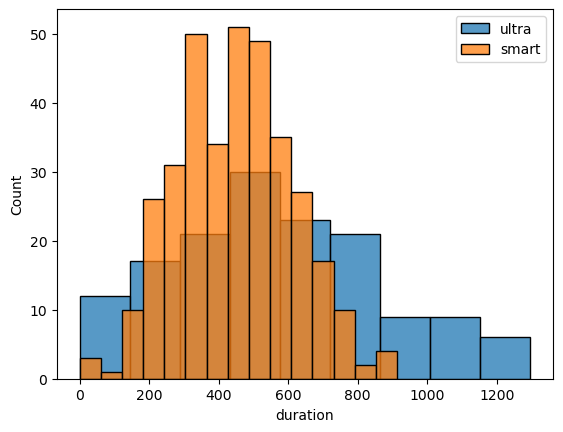

In [24]:
# Построение гистограммы распределения средней продолжительности звонков для пользователей каждого тарифа в месяц

for tariff in ['ultra', 'smart']:
    sns.histplot(medians.query('tariff == @tariff')['duration'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

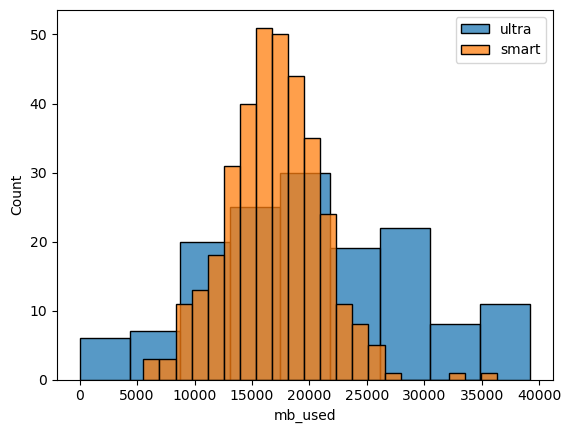

In [25]:
# Построение гистограммы распределения среднего объёма интернет-трафика для пользователей каждого тарифа в месяц

for tariff in ['ultra', 'smart']:
    sns.histplot(medians.query('tariff == @tariff')['mb_used'], kde=False)
_ = plt.legend(['ultra', 'smart'])

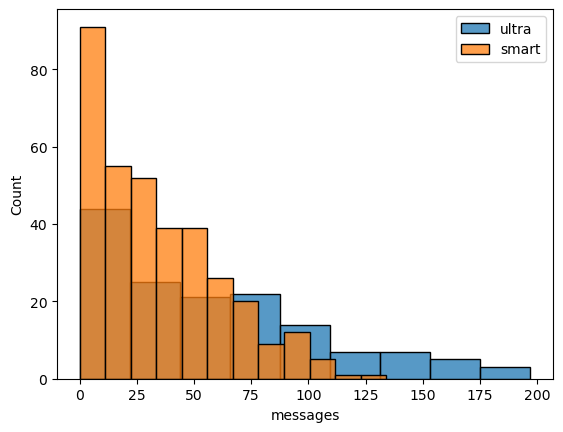

In [26]:
# Построение гистограммы распределения среднего количества сообщений для пользователей каждого тарифа в месяц
for tariff in ['ultra', 'smart']:
    sns.histplot(medians.query('tariff == @tariff')['messages'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])

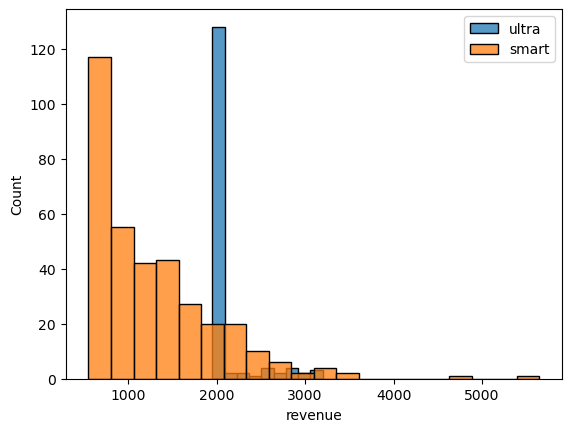

In [27]:
# Построение гистограммы распределения средней выручки от пользователей каждого тарифа в месяц
for tariff in ['ultra', 'smart']:
    sns.histplot(medians.query('tariff == @tariff')['revenue'], kde=False, label=tariff)
_ = plt.legend(['ultra', 'smart'])